<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Импорт-библиотек-⬇" data-toc-modified-id="Импорт-библиотек-⬇-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Импорт библиотек ⬇</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Исправляем-столбец-Tenure" data-toc-modified-id="Исправляем-столбец-Tenure-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Исправляем столбец Tenure</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Сделаем-порядковое-кодирование" data-toc-modified-id="Сделаем-порядковое-кодирование-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Сделаем порядковое кодирование</a></span></li><li><span><a href="#Разделим-данные-на-валидационную-и-тестовую-выборки:" data-toc-modified-id="Разделим-данные-на-валидационную-и-тестовую-выборки:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Разделим данные на валидационную и тестовую выборки:</a></span></li><li><span><a href="#Сделаем-прямое-кодирование" data-toc-modified-id="Сделаем-прямое-кодирование-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Сделаем прямое кодирование</a></span></li><li><span><a href="#Отмаштабируем-данные" data-toc-modified-id="Отмаштабируем-данные-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Отмаштабируем данные</a></span></li><li><span><a href="#модель-Случайного-леса" data-toc-modified-id="модель-Случайного-леса-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>модель Случайного леса</a></span></li><li><span><a href="#модель-Логистической-регрессии" data-toc-modified-id="модель-Логистической-регрессии-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>модель Логистической регрессии</a></span></li><li><span><a href="#f1-мера" data-toc-modified-id="f1-мера-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>f1-мера</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Увеличим-выборку" data-toc-modified-id="Увеличим-выборку-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Увеличим выборку</a></span></li><li><span><a href="#Уменьшим-выборку" data-toc-modified-id="Уменьшим-выборку-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Уменьшим выборку</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

VVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVV

### Импорт библиотек ⬇

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve

pd.options.mode.chained_assignment = None

## Подготовка данных

In [2]:
df = pd.read_csv('/datasets/Churn.csv')
display(df)
df.info()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Все данные выглядят прекрасно кроме столбца Tenure - сколько лет человек является клиентом банка

### Исправляем столбец Tenure

In [3]:
print(df['Tenure'].unique())

[ 2.  1.  8.  7.  4.  6.  3. 10.  5.  9.  0. nan]


Заполним пропуски медианой и изменим тип данных на int

In [4]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median()).astype('int')
display(df.head(2))
df.info()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Все данные в норме

In [6]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


## Исследование задачи

### Разделим данные на валидационную и тестовую выборки:

In [8]:
df_train, df_valid = train_test_split(df, test_size=0.25, random_state=12345) # валидационная выборка (25%)

df_train, df_test = train_test_split(df_train, test_size=0.25, random_state=12345) # тестовая выборка (25%)

In [9]:
print('df:', df.shape[0])
print('train:', (df_train.shape[0]*100) / df.shape[0],'%')
print('valid:', (df_valid.shape[0]*100) / df.shape[0],'%')
print('test:', (df_test.shape[0]*100) / df.shape[0],'%')

df: 10000
train: 56.25 %
valid: 25.0 %
test: 18.75 %


In [10]:
features_train = df_train.drop(['Exited'], axis=1)
target_train = df_train['Exited']

features_valid = df_valid.drop(['Exited'], axis=1)
target_valid = df_valid['Exited']

features_test = df_test.drop(['Exited'], axis=1)
target_test = df_test['Exited']

### Сделаем прямое кодирование 

In [11]:
features_train = pd.get_dummies(features_train, drop_first=True)
features_valid = pd.get_dummies(features_valid, drop_first=True)
features_test = pd.get_dummies(features_test, drop_first=True)

### Отмаштабируем данные

In [12]:
numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

### модель Случайного леса

In [13]:
best_model = None
best_depth = 0
best_est = 0
best_result = 0
for depth in range(2, 22, 2):
    for est in range(50, 351, 50):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        model_forest.fit(features_train, target_train)
        result = model_forest.score(features_valid, target_valid)
    
        if result > best_result:
            best_model = model_forest
            best_result = result
            best_depth = depth
            best_est = est
print('Accuracy наилучшей модели на валидационной выборке:', best_result.round(3))
print('Глубина дерева', best_depth)
print('Количество деревьев', best_est)

Accuracy наилучшей модели на валидационной выборке: 0.857
Глубина дерева 14
Количество деревьев 50


### модель Логистической регрессии

In [14]:
model_log = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model_log.fit(features_train, target_train)
result = model_log.score(features_train, target_train)
print('Accuracy наилучшей модели на валидационной выборке:', result.round(3))

Accuracy наилучшей модели на валидационной выборке: 0.817


### f1-мера

In [15]:
predicted_forest = model_forest.predict(features_valid)
print('F1:',f1_score(target_valid, predicted_forest, average='macro'))

F1: 0.7261392606755894


In [16]:
predicted_log = model_log.predict(features_valid)
print('F1:',f1_score(target_valid, predicted_log, average='macro'))

F1: 0.5827248416262416


In [17]:
#del model_log

Довольно низкие значения

## Борьба с дисбалансом

### Увеличим выборку

In [18]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [19]:
probabilities_valid = model_log.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print(probabilities_valid)
print('--------------------------')
print(probabilities_one_valid)

[[0.84489228 0.15510772]
 [0.90522055 0.09477945]
 [0.93919137 0.06080863]
 ...
 [0.76642192 0.23357808]
 [0.74829098 0.25170902]
 [0.78494441 0.21505559]]
--------------------------
[0.15510772 0.09477945 0.06080863 ... 0.23357808 0.25170902 0.21505559]


In [20]:
print(df['Exited'].value_counts(normalize=True))

0    0.7963
1    0.2037
Name: Exited, dtype: float64


In [21]:
model_log = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model_log.fit(features_train, target_train)
predicted_log = model_log.predict(features_valid)
print('F1:',f1_score(target_valid, predicted_log, average='macro'))

F1: 0.5827248416262416


!!!

    Увеличение выборки никак не повлияло на f1 меру
!!!

In [22]:
del model_log

### Уменьшим выборку

In [23]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [24]:
model_log = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model_log.fit(features_train, target_train)
predicted_log = model_log.predict(features_valid)
print('F1:',f1_score(target_valid, predicted_log, average='macro'))

F1: 0.5827248416262416


!!!

    Уменьшение выборки никак не повлияло на f1 меру
!!!

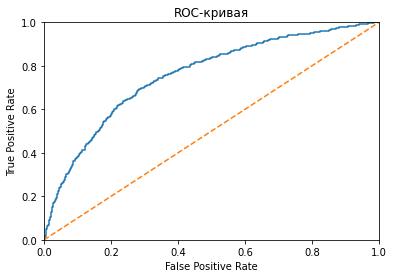

In [25]:
probabilities_valid = model_log.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

## Тестирование модели

In [26]:
model = RandomForestClassifier(random_state=12345, n_estimators=100, max_depth=10, class_weight='balanced')
model.fit(features_train, target_train)
pred = model.predict(features_test)
result_test = model.score(features_test, target_test)
final_score = f1_score(target_test, pred)
print('Accuracy наилучшей модели на тестовой выборке:', result_test.round(3))
print('F1_score', final_score)

Accuracy наилучшей модели на тестовой выборке: 0.84
F1_score 0.6052631578947368
